<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Dondurulmu%C5%9F_G%C4%B1dalar%C4%B1n_%C4%B0%C3%A7erik_Analizi_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Tanımı
Amacımız, dondurulmuş gıda ürünlerinin içerik listelerini analiz ederek:

Temel bileşenleri çıkarmak.

Alerjenleri tespit etmek.

Besin değerlerini (örneğin, kalori, protein, yağ) tanımlamak.

In [ ]:
!pip install pandas numpy spacy nltk
!python -m spacy download en_core_web_sm  # İngilizce dil modeli

In [ ]:
import pandas as pd

# Örnek veri seti
data = {
    "Ürün Adı": ["Dondurulmuş Pizza", "Dondurulmuş Tavuk Nuggets", "Dondurulmuş Bezelye"],
    "İçerik Listesi": [
        "un, su, domates sosu, peynir, şeker, tuz, maya, bitkisel yağ",
        "tavuk eti, un, su, tuz, baharatlar, bitkisel yağ",
        "bezelye, su, tuz"
    ]
}

# DataFrame oluşturma
df = pd.DataFrame(data)
print(df)

                    Ürün Adı  \
0          Dondurulmuş Pizza   
1  Dondurulmuş Tavuk Nuggets   
2        Dondurulmuş Bezelye   

                                      İçerik Listesi  
0  un, su, domates sosu, peynir, şeker, tuz, maya...  
1   tavuk eti, un, su, tuz, baharatlar, bitkisel yağ  
2                                   bezelye, su, tuz  


Adım 4: Metin Ön İşleme
Aşağıdaki kodu yeni bir hücreye yazın ve çalıştırarak metin ön işleme adımlarını uygulayın:

In [ ]:
import spacy
from nltk.corpus import stopwords
import nltk

# NLTK stopwords'ü indirme
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# SpaCy modelini yükleme
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Tokenization ve lemmatization
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.text.lower() not in stop_words]
    return tokens

# İçerik listelerini ön işleme
df["Tokenize Edilmiş İçerik"] = df["İçerik Listesi"].apply(preprocess_text)
print(df[["Ürün Adı", "Tokenize Edilmiş İçerik"]])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                    Ürün Adı  \
0          Dondurulmuş Pizza   
1  Dondurulmuş Tavuk Nuggets   
2        Dondurulmuş Bezelye   

                             Tokenize Edilmiş İçerik  
0  [un, su, domate, sosu, peynir, şeker, tuz, may...  
1  [tavuk, eti, un, su, tuz, baharatlar, bitkisel...  
2                                 [bezelye, su, tuz]  


Adım 5: Bileşenleri ve Alerjenleri Çıkarma
Aşağıdaki kodu yeni bir hücreye yazın ve çalıştırarak alerjenleri tespit edin:

In [ ]:
# Alerjen listesi
allerjenler = ["peynir", "un", "tavuk", "bezelye", "şeker"]

def extract_allergens(tokens):
    return [token for token in tokens if token in allerjenler]

# Alerjenleri çıkarma
df["Alerjenler"] = df["Tokenize Edilmiş İçerik"].apply(extract_allergens)
print(df[["Ürün Adı", "Alerjenler"]])

                    Ürün Adı           Alerjenler
0          Dondurulmuş Pizza  [un, peynir, şeker]
1  Dondurulmuş Tavuk Nuggets          [tavuk, un]
2        Dondurulmuş Bezelye            [bezelye]


Adım 6: Besin Değerlerini Tanımlama
Aşağıdaki kodu yeni bir hücreye yazın ve çalıştırarak besin değerlerini hesaplayın:

In [ ]:
# Besin değerleri sözlüğü
besin_degerleri = {
    "un": {"kalori": 364, "protein": 10, "yağ": 1},
    "peynir": {"kalori": 402, "protein": 25, "yağ": 33},
    "tavuk": {"kalori": 239, "protein": 27, "yağ": 14},
    "bezelye": {"kalori": 81, "protein": 5, "yağ": 0.4},
    "şeker": {"kalori": 387, "protein": 0, "yağ": 0},
    "tuz": {"kalori": 0, "protein": 0, "yağ": 0},
    "su": {"kalori": 0, "protein": 0, "yağ": 0},
    "bitkisel yağ": {"kalori": 884, "protein": 0, "yağ": 100},
}

def calculate_nutrition(tokens):
    kalori, protein, yağ = 0, 0, 0
    for token in tokens:
        if token in besin_degerleri:
            kalori += besin_degerleri[token]["kalori"]
            protein += besin_degerleri[token]["protein"]
            yağ += besin_degerleri[token]["yağ"]
    return {"Kalori": kalori, "Protein": protein, "Yağ": yağ}

# Besin değerlerini hesaplama
df["Besin Değerleri"] = df["Tokenize Edilmiş İçerik"].apply(calculate_nutrition)
print(df[["Ürün Adı", "Besin Değerleri"]])

                    Ürün Adı                             Besin Değerleri
0          Dondurulmuş Pizza  {'Kalori': 1153, 'Protein': 35, 'Yağ': 34}
1  Dondurulmuş Tavuk Nuggets   {'Kalori': 603, 'Protein': 37, 'Yağ': 15}
2        Dondurulmuş Bezelye    {'Kalori': 81, 'Protein': 5, 'Yağ': 0.4}


Adım 7: Sonuçları Görselleştirme
Aşağıdaki kodu yeni bir hücreye yazın ve çalıştırarak sonuçları görselleştirin:

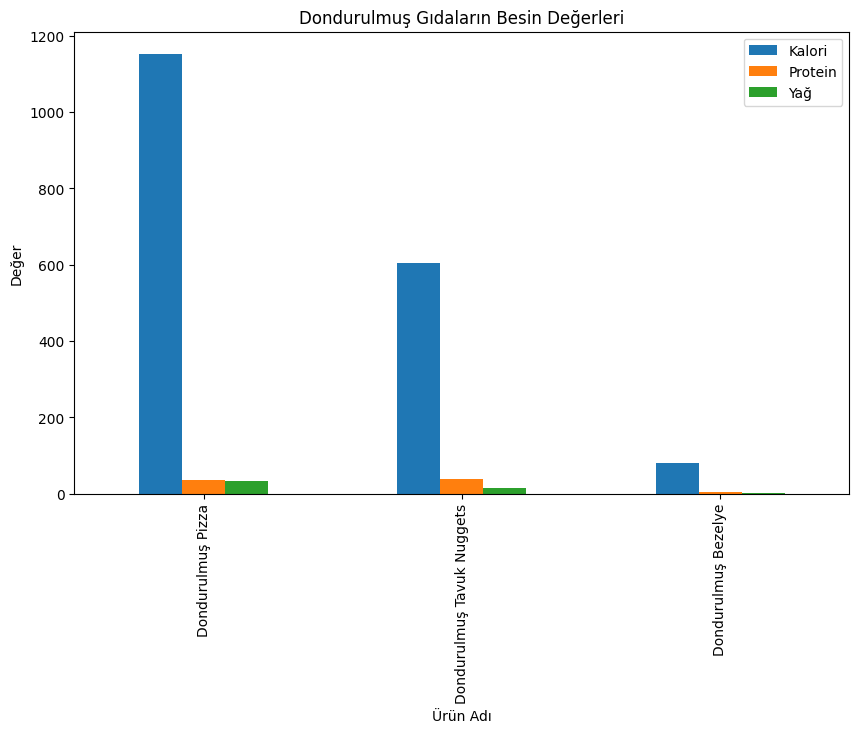

In [ ]:
import matplotlib.pyplot as plt

# Besin değerlerini ayrı sütunlara ayırma
df["Kalori"] = df["Besin Değerleri"].apply(lambda x: x["Kalori"])
df["Protein"] = df["Besin Değerleri"].apply(lambda x: x["Protein"])
df["Yağ"] = df["Besin Değerleri"].apply(lambda x: x["Yağ"])

# Görselleştirme
df.plot(kind="bar", x="Ürün Adı", y=["Kalori", "Protein", "Yağ"], figsize=(10, 6))
plt.title("Dondurulmuş Gıdaların Besin Değerleri")
plt.ylabel("Değer")
plt.show()

Adım 8: Sonuçları Kaydetme
Aşağıdaki kodu yeni bir hücreye yazın ve çalıştırarak sonuçları bir CSV dosyasına kaydedin:

In [ ]:
df.to_csv("dondurulmus_gida_analizi.csv", index=False)

Adım 9: Dosyaları İndirme


In [ ]:
from google.colab import files
files.download("dondurulmus_gida_analizi.csv")